# Data-Exploration

In [83]:
# importing necessary libs
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# loading dataset from drive
df = pd.read_excel('/content/drive/My Drive/credit_scoring/CreditScoring.xlsx')

In [86]:
# dimensions of dataset
df.shape

(3000, 30)

In [87]:
# initial data
df.head(10)

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
5,1,1483,1,1,1,2,2.0,0,124,3,...,4.0,1.0278,0.5000,0,0,2,0.6250,0,0,1.0000
6,1,1514,0,0,0,1,3.0,1,148,10,...,9.0,0.7147,0.5926,3,0,0,0.5185,0,0,0.4286
7,1,1911,3,2,0,5,1.0,3,124,2,...,4.0,0.6737,0.5333,2,0,2,0.4667,1,1,0.8571
8,1,2596,1,1,0,2,0.0,3,286,6,...,4.0,0.8001,0.1538,1,5,6,0.4615,5,5,1.0000
9,1,2767,0,0,0,0,15.0,0,175,25,...,5.0,0.5968,0.6111,1,0,1,0.5556,0,0,0.0000


In [88]:
df.drop('ID', axis=1, inplace=True)
df.shape

(3000, 29)

*We removed the "ID" feature since it will not affect our models performance in any way. Furthermore the ID is not required to determine if the loan will turn out to be good or bad.*

In [89]:
df.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [90]:
df = df.fillna(df.mean())

In [91]:
df.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

*No missing values left in CreditScoring*

In [92]:
# counting good & bad loans
df.TARGET.value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

In [93]:
# summary about 0 and 1
df.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


# Train-Test Split

In [94]:
y = df.iloc[:,0].values
x = df.iloc[:,1:28].values

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [96]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model-Building

In [97]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Model-Performance

In [98]:
print(confusion_matrix(y_test, y_pred))

[[482  16]
 [ 87  15]]


In [99]:
print(accuracy_score(y_test, y_pred))

0.8283333333333334


We have 82.83% accuracy score - indicating model is performing good

In [100]:
preds = classifier.predict_proba(x_test)
preds

array([[0.04230096, 0.95769904],
       [0.93683282, 0.06316718],
       [0.70459693, 0.29540307],
       ...,
       [0.9724934 , 0.0275066 ],
       [0.44332485, 0.55667515],
       [0.86810657, 0.13189343]])

# Writing-Files

In [101]:
df_preds_prob = pd.DataFrame(preds, columns = ['prob_0','prob_1'])
df_preds_target = pd.DataFrame(classifier.predict(x_test), columns = ['pred_target'])
df_test_data = pd.DataFrame(y_test, columns = ['ActualOutcome'])

dfx = pd.concat([df_test_data, df_preds_prob, df_preds_target], axis=1)
dfx.to_csv('/content/drive/My Drive/credit_scoring/model_pred_01.xlsx', sep = ',', encoding='UTF-8')
dfx.head()

,ActualOutcome,prob_0,prob_1,pred_target
0,1,0.042301,0.957699,1
1,0,0.936833,0.063167,0
2,0,0.704597,0.295403,0
3,0,0.908269,0.091731,0
4,0,0.866217,0.133783,0


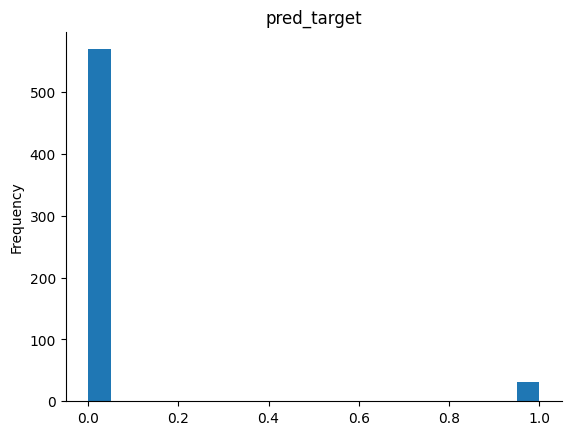

In [105]:
# @title pred_target

from matplotlib import pyplot as plt
dfx['pred_target'].plot(kind='hist', bins=20, title='pred_target')
plt.gca().spines[['top', 'right',]].set_visible(False)

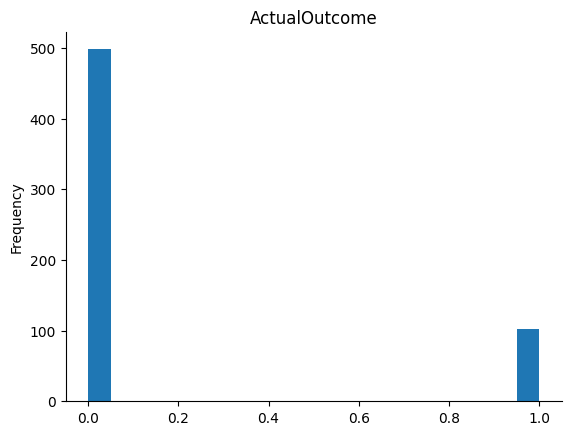

In [103]:
# @title ActualOutcome

from matplotlib import pyplot as plt
dfx['ActualOutcome'].plot(kind='hist', bins=20, title='ActualOutcome')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [112]:
dfx['ActualOutcome'].value_counts()

0    498
1    102
Name: ActualOutcome, dtype: int64

In [113]:
dfx['pred_target'].value_counts()

0    569
1     31
Name: pred_target, dtype: int64